# Actividad grupal: Detección de anomalías y técnicas de agrupamiento

Integrantes:
- Godoy Bonillo, Giocrisrai
- Ordoñez Marín, César Augusto 
- Álvarez González, Fátima del Rosario
- Castillo Quenaya,  Luis Miguel
- Santana Chavez, Erick Eduardo

#### En esta estapa se definen las principales librerias que se van a utilizar para poder realizar el laboratorio, entre las que destancan numpy para manejo de los vectores o array,  pandas para el manejo de los DataFrame, matplotlib para la representación gráfica como seaborn

In [1]:
#Herramienta que nos permite importar, gestionar de mejor forma el conjunto de datos
import pandas as pd
#Herramienta que nos ayuda en el manejo matematico de los datos 
import numpy as np
#Herramienta de visualización de datos
import seaborn as sns
#Libreria que nos ayuda en la visualización de datos
import matplotlib.pyplot as plt

- En el proceso de normalización de los datos, preprocesamientos apoyado en las librerias de scikit-learn principalmente

In [2]:
#Aplicar codificador de etiquetas
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from scipy import stats
from string import ascii_uppercase

- Librerias que nos pueden ayudar en las métricas para poder saber la precisión de los algorimos realizados

In [3]:
#Calculo mean_square_error
from sklearn.metrics import mean_squared_error
#Calculo de r2
from sklearn.metrics import r2_score
#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
#Calculo de puntaje F1 del modelo
from sklearn.metrics import f1_score
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
#Verifico la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

- Librerias que nos ayudara a ejecutar algoritmos de detección de anomalías u outliers y las técnicas de agrupamiento

In [4]:
#Isolation Forest
from sklearn.ensemble import IsolationForest
#k-means
from sklearn.cluster import KMeans
#cluster jerárquico 

- Descripción de la actividad
 - Importa los datos del Abstract data set for Credit card fraud detection:
     - https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection
     - Contiene la información necesaria sobre los datos

### Se procede a cargar la información de los datos que vamos a revisar para poder realizar el laboratorio de detección de anomalias y agrupamiento

In [5]:
dataset = "datasets_20470_26463_creditcardcsvpresent.csv"

Se procede a leer el set de datos para ser almacenados en un dataframe de ello sabemos que tiene la extención .csv con la cual podemos cargar dicha información para proceder al primer acercamiento con este set de datos para esto se utilizara la libreria de pandas que permite la lectura de dichos datos y poderlo tratar de una manera mas fácil.

Hay que tomar en cuenta que en algunas ocaciones los datos puede que la primera fila este llena de datos no relevantes con el cual recomiendan eliminar la primera fila pero para nuestro caso no porque la misma posee las etiquetas de identificación de cada columna de nuestro set de datos

Además de ello recomiendan eliminar datos extras que no sean relevantes para el análisis de la información.

In [6]:
df = pd.read_csv(dataset)

In [7]:
#Verifico la cantidad de datos que hay en el dataset
print (df.shape)

(3075, 12)


Para poder visualizar las 12 columnas en el notebook se procede a realizar la siguiente función el dato se a tomado de la propia pagina de donde se extrajeron los datos para el análisis lo que permitio saber el tamaño del set de datos y adaptarlo para una mejor exploraciónde los mismos.

In [8]:
pd.options.display.max_columns = 12

In [9]:
#se utiliza el metodo para visualizar las primeras filas del dataframe
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


Dentro de esta observación nos muestra las primeras 5 filas y nos esta dando una primera información relacionada a a las 12 columnas de las caracteristicas de las tarjetas de credito

In [10]:
#En este punto visualizamos los datos de las ultimas filas del dataframe
df.tail()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
3070,6661273532,NaN,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,NaN,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,NaN,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,NaN,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N
3074,6661273533,NaN,1500.0,36000.0,Y,0,Y,Y,754,585.0,7,N


Se complemento observando la parte inferior de nuestro DataFrame para darnos un mayor acercamiento de la información que tenemos en lo que podemos rescatar de todo esto es que tenmos un set de 12 columnas por 3075 filas para nuestra correcta evaluación

##### Explorando los datos 
El proceso de identificar los tipos de datos nos ayuda a generar un buen procesado de los mismo, ya que la información que se procesa por lo general es númerica y tendriamos que utilizar la libreria pandas que nos ayudaria en la asignación automatica de los datos tipo objeto, para ser tratados como númericos y sea mucho más fácil la manipulación de los mismos, por esta razon vamos a ir verificando que datos tenemos 

In [11]:
#Información de los tipos de datos
df.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                        object
dtype: object

En este acercamiento de los datos y verificar que tipo de dato esta en cada columna podemos observar que tenemos un set de datos con valores númericos 4 columnas datos enteros, 4 columnas float(Reales) y 4 columnas del tipo object

In [12]:
#Esto nos permite visualizar e identificar en el set de datos datos no nulos y el tipo de dato por las columnas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

- En este punto a parte de ampliar la información anterior nos esta indicando que tenemos en cada columna 3075 non-null que esto igual facilita, ya que no poseemos datos perdidos y nos da una gran ayuda con los mismos en la mayoria de las columnas a excepción de la columnas "Transaction date" la cual posee toda la columna con los datos nulos o perdidos

##### Con la función describe nos proporciona la siguiente información  de los datos númericos de nuesto dataframe #####
    . count: Se refiere al número de conteo en la columna
    . mean: se refiere al valor promedio de la columna
    . std: se refiere a la desviación estandar de la columna
    . min: se refiere a valor mínimo de la columna
    . 25%: límite de cuartiles
    . 50%: límite de cuartiles
    . 75%: límite de cuartiles
    . max: se refiere al valor máximo de la columna
##### Con la función describe nos permite visualizar un análisis estadístico de los datos si en el mismo tenemos problemas a típicos o grandes desviaciones #####

In [13]:
df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


- Con la función describe nos permite resolver uno de los items solicitados para este laboratorio el cual fue el valor mínimo, el máximo, media de cada varaible númerica.

##### Con la función df.describe(include="all") se incluyen las siguientes filas: #####

    .unique: Esto nos hace referencia al número de objetos distintos en la columna
    .top: Es el dato más frecuente que se produce
    .freq: Cantidad de veces que aparece el objeto

##### En este caso el colocarle el parametro de include = "all", nos agrega la data tipo objeto es decir incluye la estadística no numérica de nuestro set de datos en conjunto de la estadística previamente mostrada donde nos da un panorama mayor de información #####

In [14]:
df.describe(include="all")

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3.075000e+03,0.0,3075.000000,3075.000000,3075,3075.000000,3075,3075,3075.000000,3075.000000,3075.000000,3075
unique,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,N,NaN,N,N,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,3018,NaN,2369,2870,NaN,NaN,NaN,2627
mean,5.026634e+09,NaN,515.026556,9876.399210,NaN,0.957398,NaN,NaN,55.737561,40.022407,0.391870,NaN
std,9.870778e+08,NaN,291.906978,10135.331016,NaN,2.192391,NaN,NaN,206.634779,155.968840,1.548479,NaN
min,3.160041e+09,NaN,4.011527,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,4.170814e+09,NaN,269.788047,2408.781147,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,5.025578e+09,NaN,502.549575,6698.891856,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
75%,5.889625e+09,NaN,765.272803,14422.568935,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN


- Análisis descriptivo de los datos: 

In [15]:
#Valor mínimo de cada columna númerica
df.describe().min()

Merchant_id                       3075.000000
Transaction date                     0.000000
Average Amount/transaction/day       4.011527
Transaction_amount                   0.000000
Total Number of declines/day         0.000000
Daily_chargeback_avg_amt             0.000000
6_month_avg_chbk_amt                 0.000000
6-month_chbk_freq                    0.000000
dtype: float64

In [16]:
#halla el valor media o promedio de columnas númericas
df.describe().mean()

Merchant_id                       3.865710e+09
Transaction date                  0.000000e+00
Average Amount/transaction/day    9.279444e+02
Transaction_amount                1.932712e+04
Total Number of declines/day      3.872687e+02
Daily_chargeback_avg_amt          5.419215e+02
6_month_avg_chbk_amt              5.336239e+02
6-month_chbk_freq                 3.857425e+02
dtype: float64

In [17]:
#Valor de las variables númericas halla el valor máximo
df.describe().max()

Merchant_id                       6.665906e+09
Transaction date                  0.000000e+00
Average Amount/transaction/day    3.075000e+03
Transaction_amount                1.080000e+05
Total Number of declines/day      3.075000e+03
Daily_chargeback_avg_amt          3.075000e+03
6_month_avg_chbk_amt              3.075000e+03
6-month_chbk_freq                 3.075000e+03
dtype: float64

In [18]:
 #De las variables númericas hallar la desviación estandar 
df.describe().std()

Merchant_id                       2.343735e+09
Transaction date                           NaN
Average Amount/transaction/day    1.057520e+03
Transaction_amount                3.614279e+04
Total Number of declines/day      1.086029e+03
Daily_chargeback_avg_amt          1.078888e+03
6_month_avg_chbk_amt              1.082294e+03
6-month_chbk_freq                 1.086628e+03
dtype: float64

In [19]:
#De las variables númericas hallar la mediana
df.describe().median()

Merchant_id                       4.598196e+09
Transaction date                  0.000000e+00
Average Amount/transaction/day    5.087881e+02
Transaction_amount                8.287646e+03
Total Number of declines/day      4.786992e-01
Daily_chargeback_avg_amt          2.786878e+01
6_month_avg_chbk_amt              2.001120e+01
6-month_chbk_freq                 1.959350e-01
dtype: float64

In [20]:
#De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 
df.describe(include=[np.object])

,Is declined,isForeignTransaction,isHighRiskCountry,isFradulent
count,3075,3075,3075,3075
unique,2,2,2,2
top,N,N,N,N
freq,3018,2369,2870,2627


#### Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos.

In [21]:
df_numerico = df.select_dtypes(["float","int"])

In [22]:
df_numerico

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,NaN,100.0,3000.0,5,0,0.0,0
1,3160040998,NaN,100.0,4300.0,5,0,0.0,0
2,3160041896,NaN,185.5,4823.0,5,0,0.0,0
3,3160141996,NaN,185.5,5008.5,8,0,0.0,0
4,3160241992,NaN,500.0,26000.0,0,800,677.2,6
...,...,...,...,...,...,...,...,...
3070,6661273532,NaN,500.0,11000.0,0,754,585.0,7
3071,6661273532,NaN,800.0,0.0,0,754,585.0,7
3072,6661273533,NaN,800.0,20800.0,0,754,585.0,7
3073,6661273532,NaN,1500.0,12000.0,0,754,585.0,7


##### Se procedera a guardar la correlación existente de nuestro DataFrame actual en miras de poder evaluar las columnas y tener mayor claridad del set de datos

In [23]:
correlacion = df_numerico.corr()

Se procede a imprimir los datos de correlación en pantalla para dar una idea de en que estatus estamos refente cada una de las 8 columnas númericas

In [24]:
correlacion

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
Merchant_id,1.000000,NaN,0.018223,0.046065,-0.016165,0.088802,0.091621,0.118599
Transaction date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Amount/transaction/day,0.018223,NaN,1.000000,0.587111,-0.009682,0.060429,0.060284,0.071849
Transaction_amount,0.046065,NaN,0.587111,1.000000,0.259309,0.252298,0.259663,0.297623
Total Number of declines/day,-0.016165,NaN,-0.009682,0.259309,1.000000,0.094834,0.081138,0.085028
Daily_chargeback_avg_amt,0.088802,NaN,0.060429,0.252298,0.094834,1.000000,0.953663,0.884611
6_month_avg_chbk_amt,0.091621,NaN,0.060284,0.259663,0.081138,0.953663,1.000000,0.851339
6-month_chbk_freq,0.118599,NaN,0.071849,0.297623,0.085028,0.884611,0.851339,1.000000


Se procedio a realizar la función de corr de la librerias de pandas con la finalidad de poder observar la correlación que existe con cada una de las variables númericas del conjunto de datos entendiendo lo siguiente:
    
- Correlación con valores negativos cercanos a -1 es una correlación negativa a medida que se haga -1 influye de manera negativa el mismo, lo que nos quiere decir que trabajan de manera inversa entre dichas variables.
- Correlación con valores positivos ceranos a 1 existe una correlación positiva a medida que ambos se acerquen a 1 se indica de una covariación
- Correlación igual a cero significa que no es posible determinar algún sentido de covariación de forma lineal 

Entendiendo esto nos toca analizar dicha matriz para entender nuestros datos y sabiendo nuestra variable objetivo como se relaciona con cada una de las variables, lo que nos puede facilitar la toma de decisión para los conjuntos de entrenamientos con respecto a los datos que aqui se nos presentan

- Matriz de correlación utilizando el mapa de calor

Para una mejor representación grafica se ocupara la libreria seaborn para representar graficamente la matriz de correlación utilizando el mapa de calor y de este modo apreciar de una manera visual lo que nos pueda ayudar el entendimiento de dicha relación de las variables

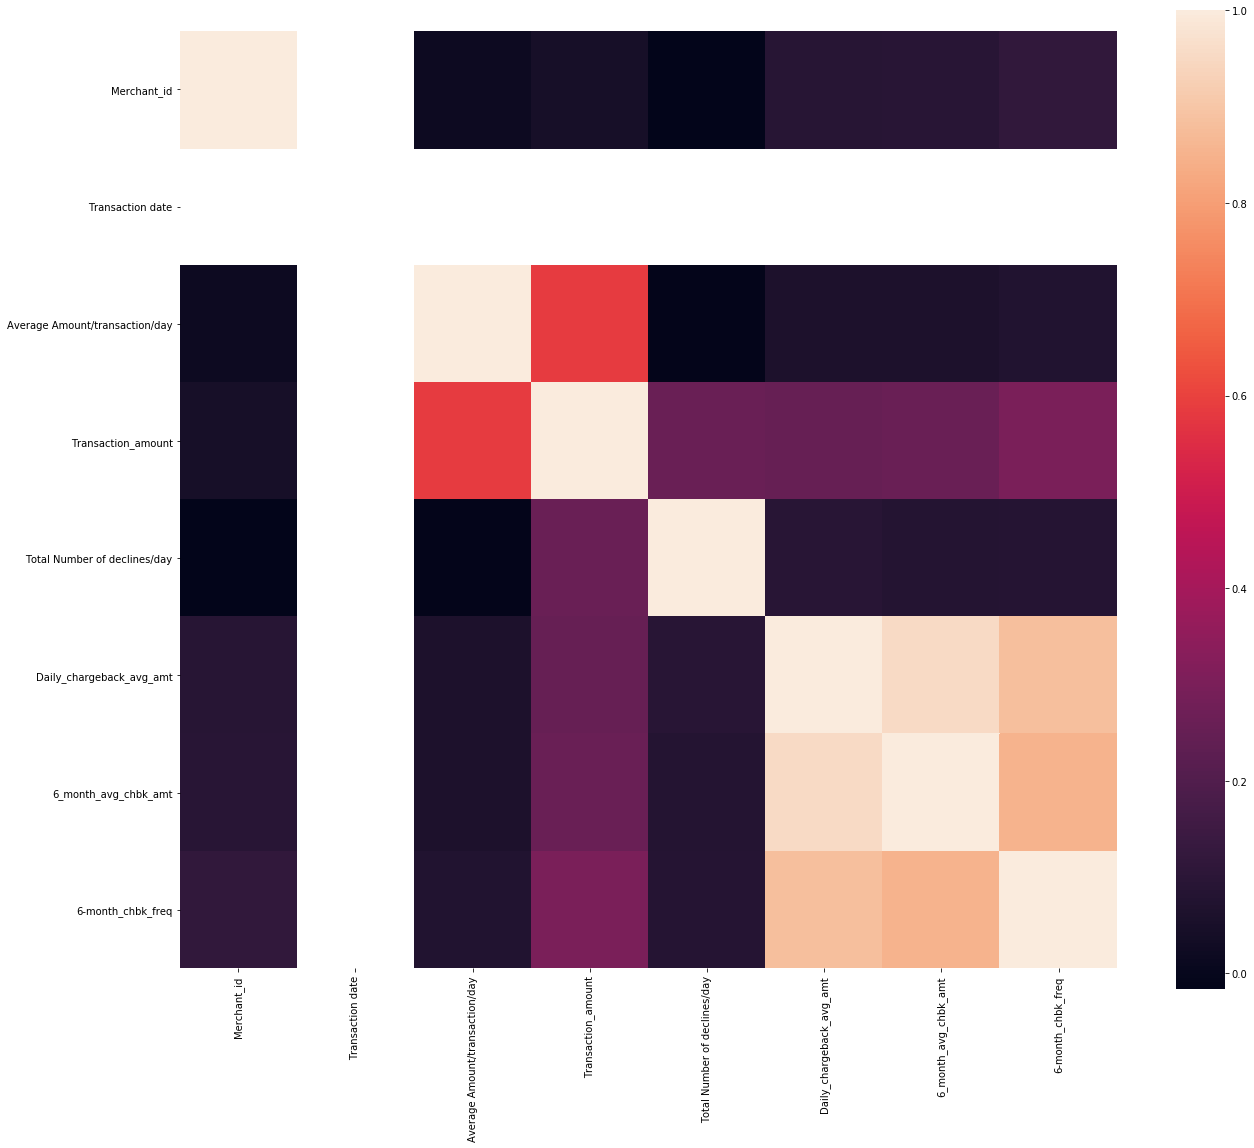

In [25]:
f, ax = plt.subplots(figsize=(21, 18))
sns.heatmap(correlacion,vmax=1,square=True);

En este punto se puede observar que con el apoyo grafico no se notan sino algunos puntos que podrian tener una correlación por el color empleado de igual forma nos apoyaremos en saber la correlación supero a 0.8 para que se nos facilite aún más lo ya previamente observado

In [26]:
max_correlacion = correlacion[correlacion>=.8]

Se procede con la impresión de las máximas correlaciones para nuestra evaluación

In [27]:
max_correlacion

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
Merchant_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Amount/transaction/day,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Transaction_amount,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Total Number of declines/day,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Daily_chargeback_avg_amt,NaN,NaN,NaN,NaN,NaN,1.000000,0.953663,0.884611
6_month_avg_chbk_amt,NaN,NaN,NaN,NaN,NaN,0.953663,1.000000,0.851339
6-month_chbk_freq,NaN,NaN,NaN,NaN,NaN,0.884611,0.851339,1.000000


En lo que se puede observar la columna que nos hace referencia a una correlación alta entre:
- Daily_chargeback_avg_amt con 6_month_avg_chbk_amt	de un 0.953663	
- Daily_chargeback_avg_amt con month_chbk_freq de un 0.884611
- 6_month_avg_chbk_amt con month_chbk_freq de un 0.851339

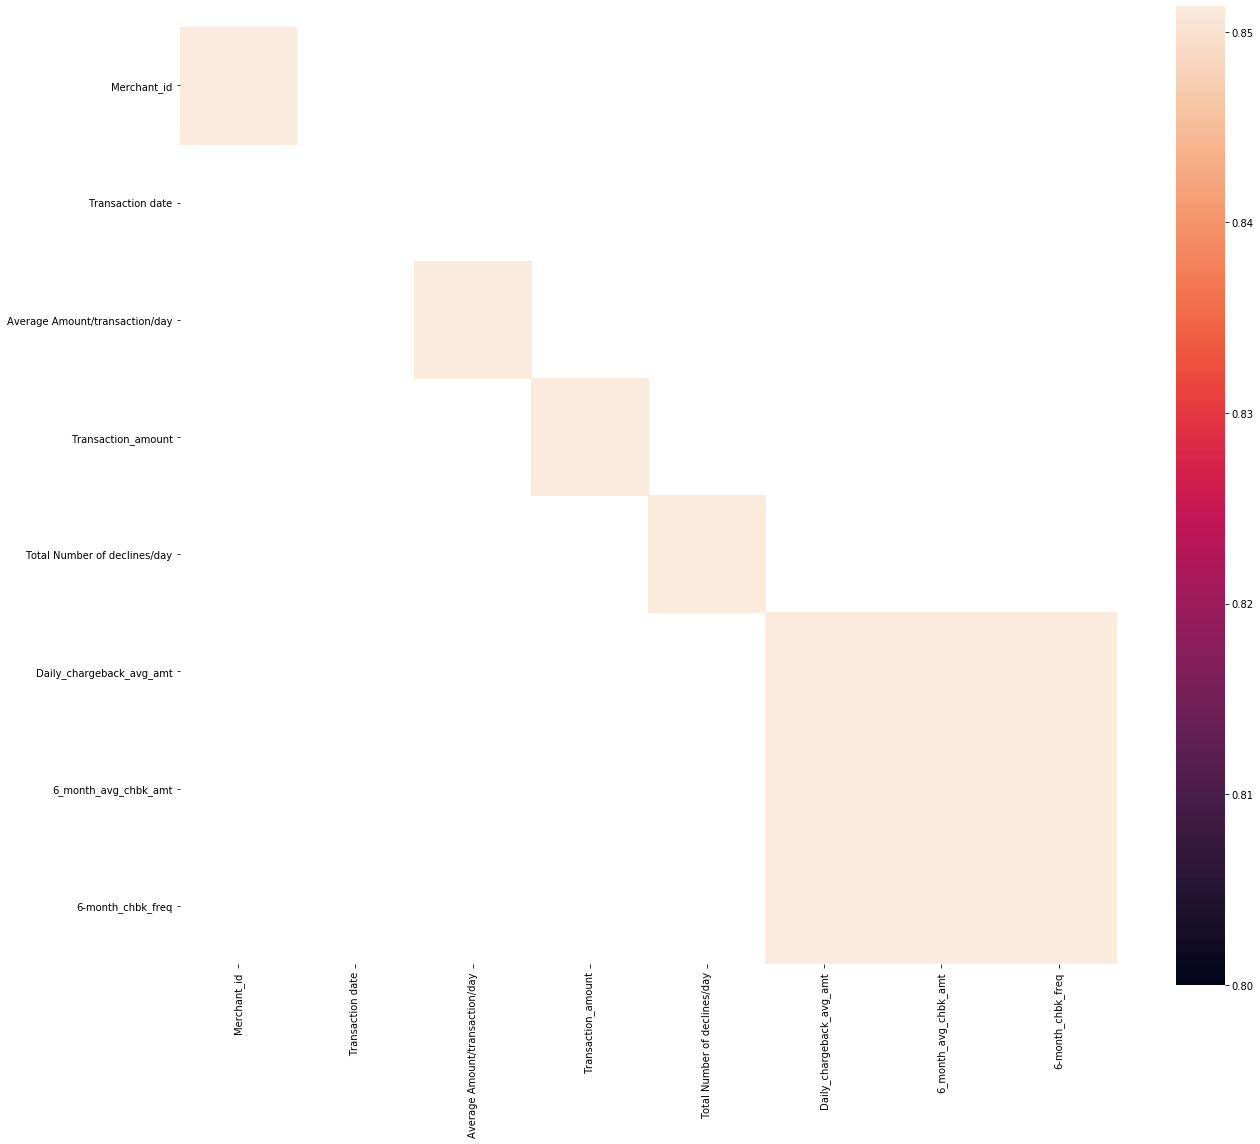

In [28]:
f, ax = plt.subplots(figsize=(21, 18))
sns.heatmap(max_correlacion,vmax=.8,square=True);

En base a los datos observados que tienen una alta correlación se procedera a evaluar de los datos númericos la covarianza para verificar si las columnas que poseen alta correlación coinciden con alta covarianza

In [29]:
covarianza = df_numerico.cov()

In [30]:
covarianza

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
Merchant_id,9.743226e+17,NaN,5.250605e+09,4.608513e+11,-3.498236e+07,1.811238e+10,1.410540e+10,1.812744e+08
Transaction date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Amount/transaction/day,5.250605e+09,NaN,8.520968e+04,1.737011e+06,-6.196153e+00,3.644955e+03,2.744648e+03,3.247668e+01
Transaction_amount,4.608513e+11,NaN,1.737011e+06,1.027249e+08,5.761996e+03,5.283909e+05,4.104739e+05,4.670993e+03
Total Number of declines/day,-3.498236e+07,NaN,-6.196153e+00,5.761996e+03,4.806577e+00,4.296214e+01,2.774464e+01,2.886581e-01
Daily_chargeback_avg_amt,1.811238e+10,NaN,3.644955e+03,5.283909e+05,4.296214e+01,4.269793e+04,3.073522e+04,2.830485e+02
6_month_avg_chbk_amt,1.410540e+10,NaN,2.744648e+03,4.104739e+05,2.774464e+01,3.073522e+04,2.432628e+04,2.056106e+02
6-month_chbk_freq,1.812744e+08,NaN,3.247668e+01,4.670993e+03,2.886581e-01,2.830485e+02,2.056106e+02,2.397787e+00


Entendiendo que la mayor correlación que existe son de las siguientes columnas:
- Daily_chargeback_avg_amt
- 6_month_avg_chbk_amt
- 6-month_chbk_freq

In [31]:
covarianza.loc["Daily_chargeback_avg_amt", "6_month_avg_chbk_amt"]

30735.22468511597

In [32]:
covarianza.loc["Daily_chargeback_avg_amt", "6-month_chbk_freq"]

283.04854880432026

In [33]:
covarianza.loc["6_month_avg_chbk_amt", "6-month_chbk_freq"]

205.61057259682985

- Dentro de la evaluación podemos notar que existe una alta covarianza entre "Daily_chargeback_avg_amt" y "6_month_avg_chbk_amt"

#### Se procedera al tratamiento de los datos según la información que levantamos

- En primer lugar se puede observar que la columna "Transaction date" todos los valores son nulos por lo cual se puede proceder a la eliminación de la misma

In [34]:
df["Transaction date"].isnull().sum()

3075

In [35]:
df1 = df.copy()
df1

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,NaN,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,NaN,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,NaN,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,NaN,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


In [36]:
df1.drop(["Transaction date"], axis='columns', inplace=True)
df1

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


Se pudo observar una alta correlación y una alta covarianza entre "Daily_chargeback_avg_amt" y "6_month_avg_chbk_amt" por lo que se procede a eliminar "6_month_avg_chbk_amt"

In [37]:
df1.drop(["6_month_avg_chbk_amt"], axis='columns', inplace=True)
df1

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,6,Y
...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,Y,0,N,N,754,7,N
3071,6661273532,800.0,0.0,Y,0,N,N,754,7,N
3072,6661273533,800.0,20800.0,Y,0,N,N,754,7,N
3073,6661273532,1500.0,12000.0,Y,0,Y,Y,754,7,N


- Se procedera a realizar el cambio de los valores categoricos que en este caso tenemos de 4 columnas los cuales estan respresentados por "Y"representando si el cual cambiaremos por "1" y "N" representado por no cambiado por "0", de este modo podremos trabajar con el dataframe con datos númericos completamente

In [38]:
df1["Is declined"] = df1["Is declined"].replace(["N"], 0)
df1["Is declined"] = df1["Is declined"].replace(["Y"], 1)
df1

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,Y,Y,0,0,Y
1,3160040998,100.0,4300.0,0,5,Y,Y,0,0,Y
2,3160041896,185.5,4823.0,1,5,N,N,0,0,Y
3,3160141996,185.5,5008.5,1,8,N,N,0,0,Y
4,3160241992,500.0,26000.0,0,0,Y,Y,800,6,Y
...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,N,N,754,7,N
3071,6661273532,800.0,0.0,1,0,N,N,754,7,N
3072,6661273533,800.0,20800.0,1,0,N,N,754,7,N
3073,6661273532,1500.0,12000.0,1,0,Y,Y,754,7,N


In [39]:
df1["isForeignTransaction"] = df1["isForeignTransaction"].replace(["N"], 0)
df1["isForeignTransaction"] = df1["isForeignTransaction"].replace(["Y"], 1)
df1

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,Y,0,0,Y
1,3160040998,100.0,4300.0,0,5,1,Y,0,0,Y
2,3160041896,185.5,4823.0,1,5,0,N,0,0,Y
3,3160141996,185.5,5008.5,1,8,0,N,0,0,Y
4,3160241992,500.0,26000.0,0,0,1,Y,800,6,Y
...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,0,N,754,7,N
3071,6661273532,800.0,0.0,1,0,0,N,754,7,N
3072,6661273533,800.0,20800.0,1,0,0,N,754,7,N
3073,6661273532,1500.0,12000.0,1,0,1,Y,754,7,N


In [40]:
df1["isHighRiskCountry"] = df1["isHighRiskCountry"].replace(["N"], 0)
df1["isHighRiskCountry"] = df1["isHighRiskCountry"].replace(["Y"], 1)
df1

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0,Y
1,3160040998,100.0,4300.0,0,5,1,1,0,0,Y
2,3160041896,185.5,4823.0,1,5,0,0,0,0,Y
3,3160141996,185.5,5008.5,1,8,0,0,0,0,Y
4,3160241992,500.0,26000.0,0,0,1,1,800,6,Y
...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,0,0,754,7,N
3071,6661273532,800.0,0.0,1,0,0,0,754,7,N
3072,6661273533,800.0,20800.0,1,0,0,0,754,7,N
3073,6661273532,1500.0,12000.0,1,0,1,1,754,7,N


In [41]:
df1["isFradulent"] = df1["isFradulent"].replace(["N"], 0)
df1["isFradulent"] = df1["isFradulent"].replace(["Y"], 1)
df1

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,6,1
...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,0,0,754,7,0
3071,6661273532,800.0,0.0,1,0,0,0,754,7,0
3072,6661273533,800.0,20800.0,1,0,0,0,754,7,0
3073,6661273532,1500.0,12000.0,1,0,1,1,754,7,0


In [42]:
X = df1.iloc[:,:-1].values

In [43]:
y = df1.iloc[:,-1].values

STANDARD SCALER

El StandardScaler nos transformará slos datos de modo que su distribución tenga un valor medio 0 y una desviación estándar de 1.

In [44]:
X = StandardScaler().fit_transform(X)

Separo los datos de entrenamiento y prueba para probar los algoritmos

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Implementación de isolation forest

In [46]:
algoritmo = IsolationForest(max_samples=100)

In [47]:
algoritmo.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [52]:
y_pred_train = algoritmo.predict(X_train)

In [49]:
y_pred_test = algoritmo.predict(X_test)

In [50]:
matriz = confusion_matrix(y_pred_test, y_pred_train)
print("Matriz de confución:")
print(matriz)

ValueError: Found input variables with inconsistent numbers of samples: [615, 2460]